# Task 2 : User Engagement Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import the dataset
df=pd.read_excel('telcom_data.xlsx')

In [4]:
#Convert spaces into underscore in column name of dataframe and Uppercase to lowercase
def new_columns(df):
    df.columns= [column.replace(' ', '_').lower() for column in df.columns]
    return df

In [5]:
df = new_columns(df)

In [6]:
df

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   bearer_id                                 150001 non-null  object        
 1   start                                     150000 non-null  datetime64[ns]
 2   start_ms                                  150000 non-null  float64       
 3   end                                       150000 non-null  datetime64[ns]
 4   end_ms                                    150000 non-null  float64       
 5   dur._(ms)                                 150000 non-null  float64       
 6   imsi                                      149431 non-null  float64       
 7   msisdn/number                             148935 non-null  float64       
 8   imei                                      149429 non-null  float64       
 9   last_location_n

We need to combine the total UL and Dl data of each application

In [8]:
df["social_media"] = df["social_media_dl_(bytes)"] + df['social_media_ul_(bytes)']
df["google"] = df["google_dl_(bytes)"] + df["google_ul_(bytes)"]
df['email'] = df["email_dl_(bytes)"] + df["email_ul_(bytes)"]
df['youtube'] = df["youtube_dl_(bytes)"] + df["youtube_ul_(bytes)"]
df['netflix'] = df["netflix_dl_(bytes)"] + df["netflix_ul_(bytes)"]
df["gaming"] = df["gaming_dl_(bytes)"] + df["gaming_ul_(bytes)"]
df['other']= df["other_dl_(bytes)"]+ df["other_ul_(bytes)"]
df['total_data'] = df['total_dl_(bytes)'] + df['total_ul_(bytes)']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   bearer_id                                 150001 non-null  object        
 1   start                                     150000 non-null  datetime64[ns]
 2   start_ms                                  150000 non-null  float64       
 3   end                                       150000 non-null  datetime64[ns]
 4   end_ms                                    150000 non-null  float64       
 5   dur._(ms)                                 150000 non-null  float64       
 6   imsi                                      149431 non-null  float64       
 7   msisdn/number                             148935 non-null  float64       
 8   imei                                      149429 non-null  float64       
 9   last_location_n

In [10]:
df1 =df.rename(columns={'msisdn/number': 'msisdn', 'dur._(ms)': 'duration' })

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 63 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   bearer_id                                 150001 non-null  object        
 1   start                                     150000 non-null  datetime64[ns]
 2   start_ms                                  150000 non-null  float64       
 3   end                                       150000 non-null  datetime64[ns]
 4   end_ms                                    150000 non-null  float64       
 5   duration                                  150000 non-null  float64       
 6   imsi                                      149431 non-null  float64       
 7   msisdn                                    148935 non-null  float64       
 8   imei                                      149429 non-null  float64       
 9   last_location_n

In [12]:
#Aggregate the sessions frequency count for bearer id
session_count = df1.groupby('msisdn').agg({'bearer_id':'count'})
session_freq_metrics = session_count.sort_values(by=['bearer_id'],ascending=False)

In [13]:
session_freq_metrics.head(10)

,bearer_id
msisdn,
3.362632e+10,18
3.362578e+10,17
3.361489e+10,17
3.365973e+10,16
3.376054e+10,15
3.367588e+10,15
3.366716e+10,13
3.362708e+10,12
3.360452e+10,12


In [14]:
#Aggregate the sessions frequency count for duration
duration_count = df1.groupby('msisdn').agg({'duration':'sum'})
duration_metrics = duration_count.sort_values(by=['duration'],ascending=False)
duration_metrics.head(10)

,duration
msisdn,
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
3.366284e+10,6614270.0
3.366469e+10,6288730.0
3.360313e+10,6287761.0
3.366746e+10,5649882.0


In [15]:
#Aggregate the sessions frequency for total data
total_data_count = df1.groupby('msisdn').agg({'total_data':'sum'})
total_data_metrics = total_data_count.sort_values(by=['total_data'],ascending=False)
total_data_metrics.head(10)

,total_data
msisdn,
3.361489e+10,8.846226e+09
3.376054e+10,8.514774e+09
3.362578e+10,8.499621e+09
3.362632e+10,7.971167e+09
3.367588e+10,7.891111e+09
3.365973e+10,7.705863e+09
3.366646e+10,7.308501e+09
3.376041e+10,7.132371e+09
3.366471e+10,6.872018e+09


# Task 2.1

In [16]:
engagement_metrics = df1.groupby('msisdn').agg({'bearer_id': 'count','duration': 'sum', 'total_data': 'sum',})
engagement_metrics = engagement_metrics.rename(columns={'bearer_id': 'session_frequency', 'total_data': 'total_traffic'})
engagement_metrics.sort_values(by=['session_frequency'], ascending=False)

,session_frequency,duration,total_traffic
msisdn,,,
3.362632e+10,18,8791927.0,7.971167e+09
3.362578e+10,17,18553754.0,8.499621e+09
3.361489e+10,17,9966898.0,8.846226e+09
3.365973e+10,16,4035428.0,7.705863e+09
3.376054e+10,15,9279434.0,8.514774e+09
...,...,...,...
3.366068e+10,1,86400.0,3.778853e+08
3.366068e+10,1,13150.0,2.625487e+08
3.366067e+10,1,102488.0,7.306324e+08


In [26]:
engagement_metrics.describe().style.background_gradient(cmap = "Blues")

,session_frequency,duration,total_traffic
count,106856.000000,106856.000000,106856.000000
mean,1.393792,146167.156323,690962103.307751
std,0.806022,186358.669675,491055891.074222
min,1.000000,7142.000000,33249009.000000
25%,1.000000,71308.000000,358549907.500000
50%,1.000000,102740.000000,617923138.000000
75%,2.000000,172799.000000,857435147.750000
max,18.000000,18553754.000000,8846226494.000000


[Text(0.5, 1.0, 'Outlier detection for bearer_id count')]

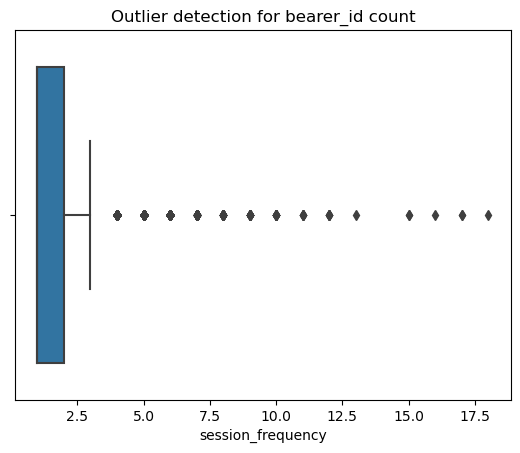

In [27]:
sns.boxplot(data=engagement_metrics, x='session_frequency').set(title="Outlier detection for bearer_id count")

[Text(0.5, 1.0, 'Outlier detection for Total duration')]

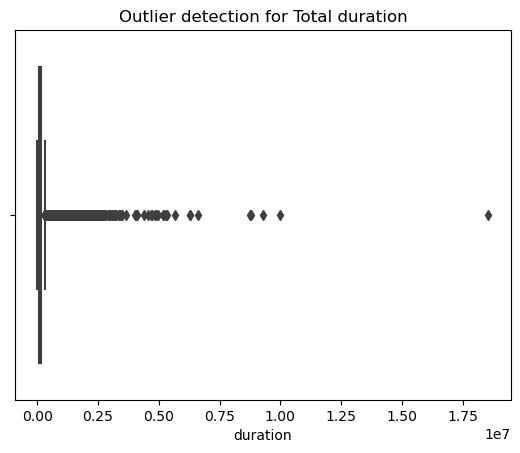

In [28]:
sns.boxplot(data=engagement_metrics, x='duration').set(title="Outlier detection for Total duration")

[Text(0.5, 1.0, 'Outlier detection for Total_data')]

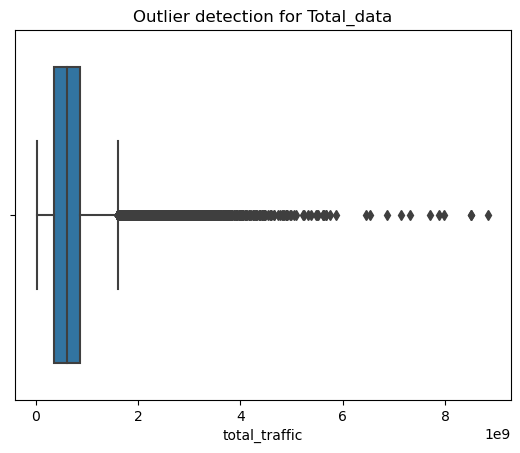

In [29]:
sns.boxplot(data=engagement_metrics, x='total_traffic').set(title="Outlier detection for Total_data")

There are outliers present in above three metrics.

In [30]:
def handle_outliers(df1, col):
    df1 = df1.copy()
    q1 = df1[col].quantile(0.25)
    q2 = df1[col].quantile(0.50)
    q3 = df1[col].quantile(0.75)
    
    iqr=q3-q1
    lower_range=q1-iqr*1.5
    upper_range=q3+iqr*1.5
    
    df1[col] = np.where(df1[col] < lower_range, lower_range, df1[col])
    df1[col] = np.where(df1[col] > upper_range, upper_range, df1[col])
    
    return df1

In [31]:
new_engagement_metrics = handle_outliers(engagement_metrics, 'session_frequency')
new_engagement_metrics = handle_outliers(new_engagement_metrics, 'duration')
new_engagement_metrics = handle_outliers(new_engagement_metrics, 'total_traffic')

In [37]:
new_engagement_metrics.describe().style.background_gradient(cmap = "Reds")

,session_frequency,duration,total_traffic
count,106856.000000,106856.000000,106856.000000
mean,1.359582,130253.994394,663626341.975427
std,0.653562,87611.985353,395927394.547047
min,1.000000,7142.000000,33249009.000000
25%,1.000000,71308.000000,358549907.500000
50%,1.000000,102740.000000,617923138.000000
75%,2.000000,172799.000000,857435147.750000
max,3.500000,325035.500000,1605763008.125000


[Text(0.5, 1.0, 'Outlier detection for bearer_id count')]

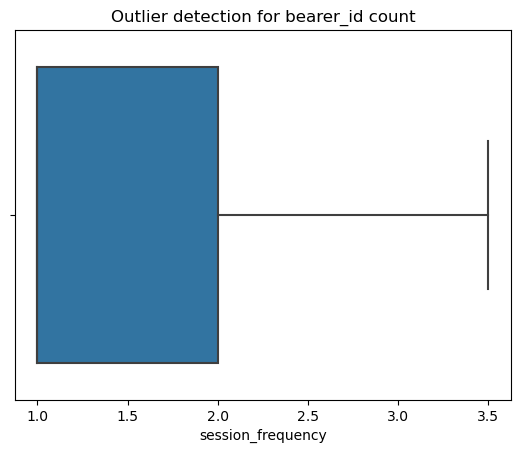

In [38]:
sns.boxplot(data=new_engagement_metrics, x='session_frequency').set(title="Outlier detection for bearer_id count")

[Text(0.5, 1.0, 'Outlier detection for Total duration')]

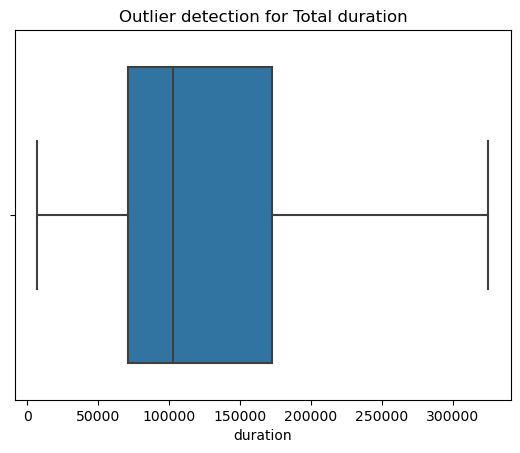

In [39]:
sns.boxplot(data=new_engagement_metrics, x='duration').set(title="Outlier detection for Total duration")

[Text(0.5, 1.0, 'Outlier detection for Total_data')]

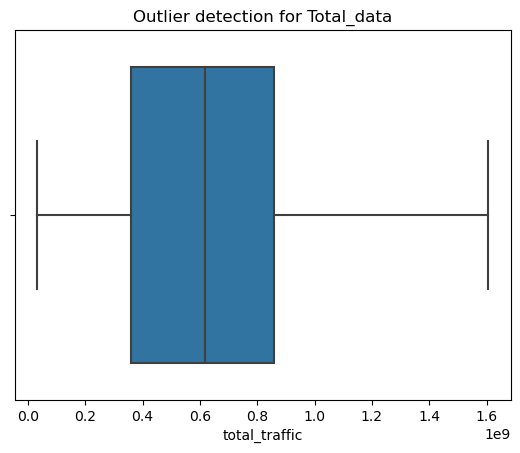

In [40]:
sns.boxplot(data=new_engagement_metrics, x='total_traffic').set(title="Outlier detection for Total_data")

• Plot the top 3 most used applications using appropriate charts.

In [41]:
app_metrics = []

app_columns = ['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming']

app_metrics = df1.groupby('msisdn').agg({'social_media': 'sum', 'google': 'sum', 'email': 'sum',
                                        'youtube': 'sum', 'netflix': 'sum', 'gaming': 'sum'})

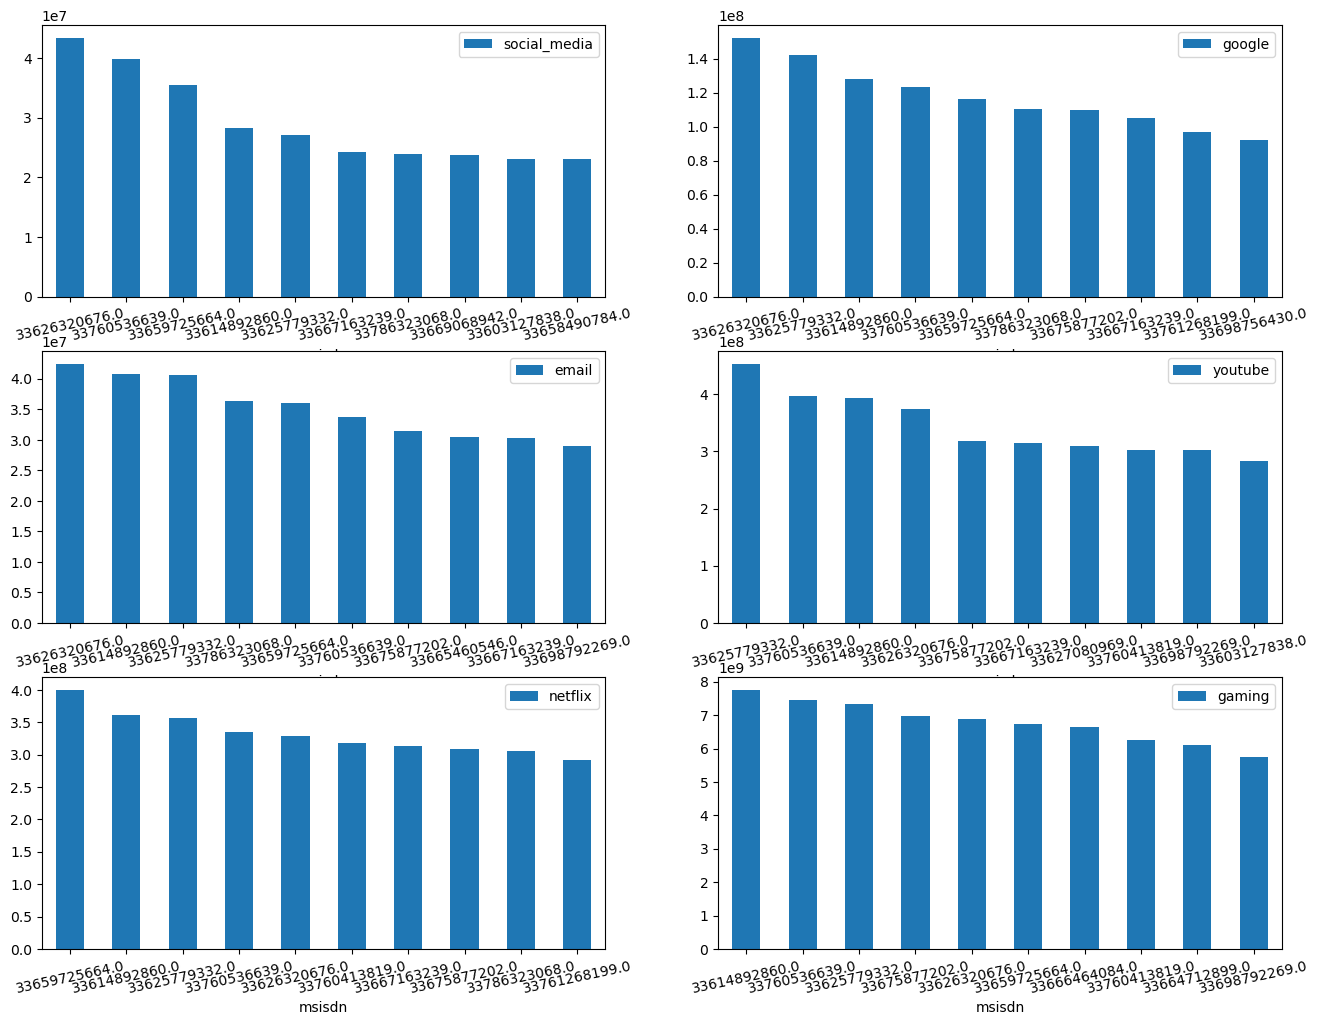

In [42]:
figure, axes = plt.subplots(3, 2, figsize=(16,12))

count = 0
for app_metric in app_metrics:
    
    x = app_metrics[[app_metric]].sort_values(by = [app_metric],
                                              ascending=False).head(10)
    x.plot.bar(y=app_metric, ax=axes[(count//2), count%2], rot=12)
    count += 1

In [43]:
total_app_df = pd.DataFrame(columns=['app', 'total'])
total_app_df['app'] = app_columns

app_metrics
apps_total = []

for app in app_columns:
    apps_total.append(app_metrics.sum()[app])
total_app_df['total'] =apps_total
    
total_app_df

,app,total
0,social_media,2.722655e+11
1,google,1.162853e+12
2,email,3.364677e+11
3,youtube,3.372204e+12
4,netflix,3.370060e+12
5,gaming,6.408892e+13


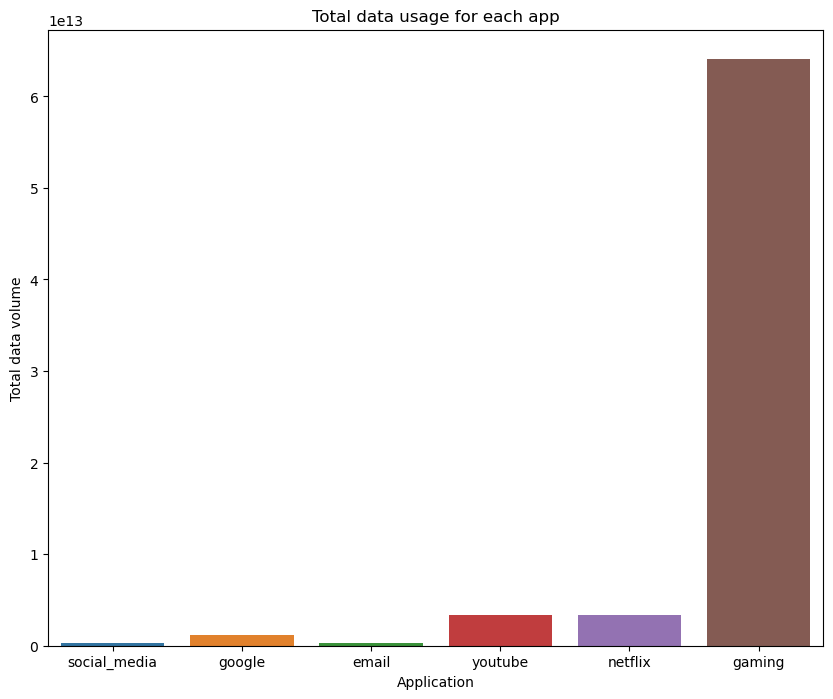

In [44]:
#Plot the results
plt.figure(figsize=(10,8))
sns.barplot(data=total_app_df, x='app', y='total')
plt.xlabel("Application")
plt.ylabel("Total data volume")
plt.title("Total data usage for each app")
plt.show()

Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement.

In [45]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans

In [46]:
metrics_to_normalize = new_engagement_metrics[['session_frequency', 'duration', 'total_traffic']]  
scaler = MinMaxScaler()

norm_metrics = scaler.fit_transform(metrics_to_normalize)
normalized_metrics = pd.DataFrame(norm_metrics, columns=metrics_to_normalize.columns)
print(normalized_metrics)

        session_frequency  duration  total_traffic
0                     0.0  0.344700       0.537637
1                     0.0  0.547630       0.078607
2                     0.0  0.402106       0.357846
3                     0.0  0.134435       0.247420
4                     0.4  0.094252       0.905659
...                   ...       ...            ...
106851                0.0  0.005247       0.433314
106852                0.0  0.421040       0.284295
106853                0.0  1.000000       0.126469
106854                0.0  0.773492       0.358050
106855                0.0  1.000000       0.067347

[106856 rows x 3 columns]


In [48]:
normalized_metrics.describe().style.background_gradient(cmap = "Greens")

,session_frequency,duration,total_traffic
count,106856.000000,106856.000000,106856.000000
mean,0.143833,0.387274,0.400872
std,0.261425,0.275602,0.251780
min,0.000000,0.000000,0.000000
25%,0.000000,0.201847,0.206867
50%,0.000000,0.300723,0.371809
75%,0.400000,0.521108,0.524120
max,1.000000,1.000000,1.000000


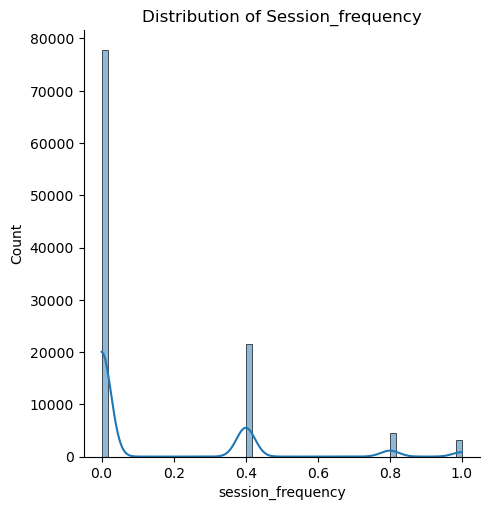

In [49]:
sns.displot(data=normalized_metrics, x='session_frequency',kde=True).set(title="Distribution of Session_frequency")

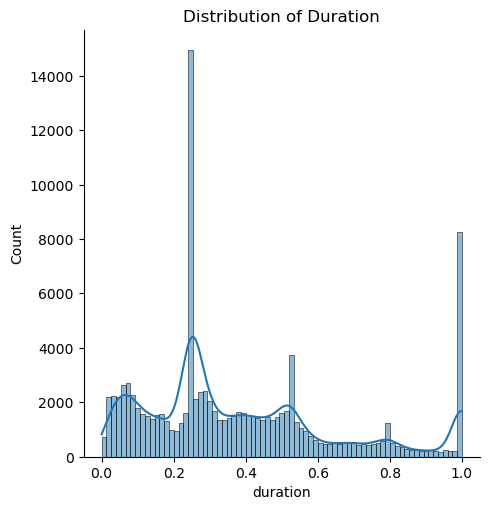

In [50]:
sns.displot(data=normalized_metrics, x='duration',kde=True).set(title="Distribution of Duration")

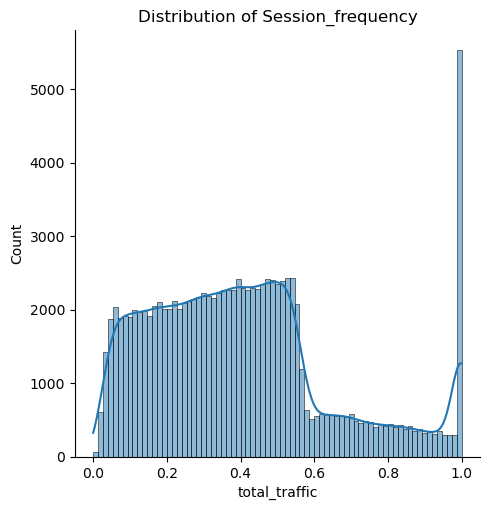

In [51]:
sns.displot(data=normalized_metrics, x='total_traffic',kde=True).set(title="Distribution of Session_frequency")

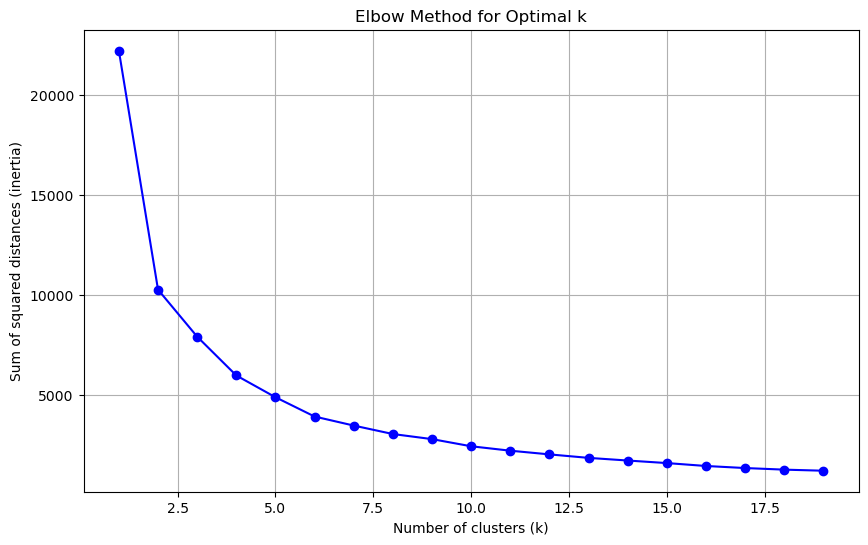

In [53]:
#Elbow Method :
#Define a range of k values to evaluate
k_values = range(1, 20)  # try different values of k from 1 to 20

#Initialize a list to store the inertia values
inertia_values = []

#Iterate over each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(normalized_metrics)
    inertia_values.append(kmeans.inertia_)

#Plot the results
plt.figure(figsize=(10,6))
plt.plot(k_values, inertia_values,'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid()

From the results of the above method, we select :

k : Clusters = 3

In [55]:
kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

engagement_metrics_with_cluster = new_engagement_metrics.copy()
engagement_metrics_with_cluster['clusters'] = pred

In [56]:
print(engagement_metrics_with_cluster['clusters'])

msisdn
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    0
               ..
3.379000e+10    1
3.379000e+10    1
3.197021e+12    0
3.370000e+14    0
8.823971e+14    0
Name: clusters, Length: 106856, dtype: int32


In [57]:
def cluster_label(x: int, cols: list = []) -> str:
    if (not type(x) == int):
        return x
    if (x < len(cols)):
        return cols[x]

    return str(x)

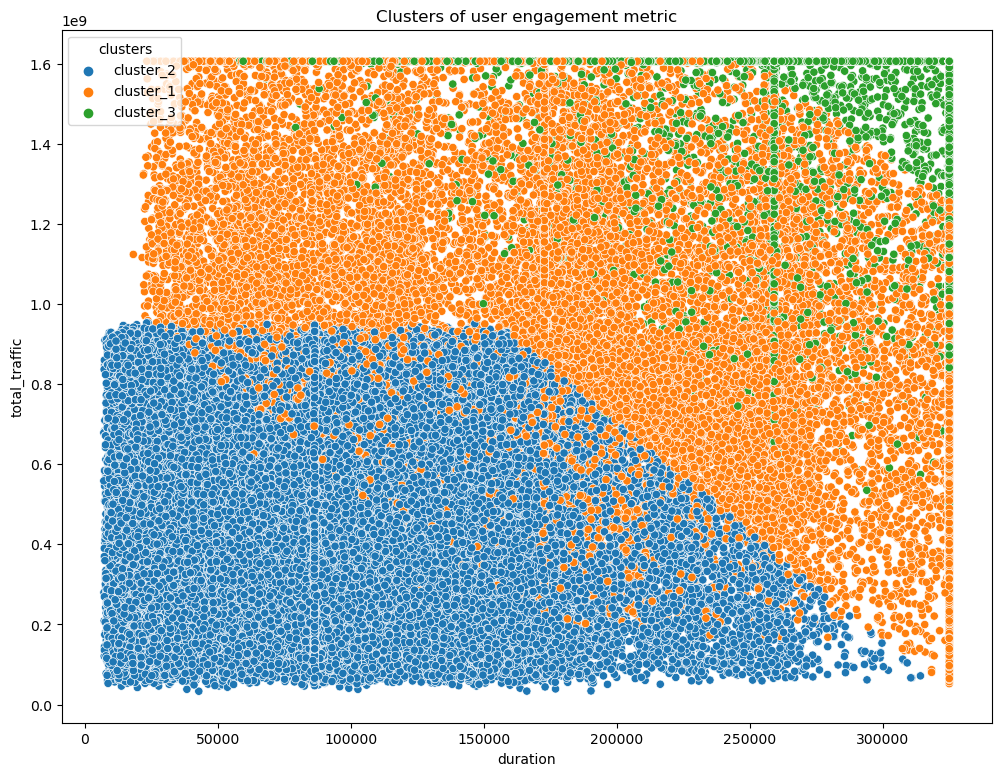

,session_frequency,duration,total_traffic
count,106856.000000,106856.000000,1.068560e+05
mean,1.359582,130253.994394,6.636263e+08
std,0.653562,87611.985353,3.959274e+08
min,1.000000,7142.000000,3.324901e+07
25%,1.000000,71308.000000,3.585499e+08
50%,1.000000,102740.000000,6.179231e+08
75%,2.000000,172799.000000,8.574351e+08
max,3.500000,325035.500000,1.605763e+09


In [58]:
labels = ['cluster_1', 'cluster_2', 'cluster_3']

engagement_metrics_with_cluster['clusters'] = engagement_metrics_with_cluster['clusters'].map(lambda x: cluster_label(x, labels))

# Now, let's count the occurrences of each cluster label
engagement_metrics_with_cluster['clusters'].value_counts()

plt.figure(figsize=(12,9))

sns.scatterplot(x = 'duration', y='total_traffic', hue='clusters',
                data=engagement_metrics_with_cluster).set_title('Clusters of user engagement metric')
plt.show()

engagement_metrics_with_cluster.describe()

In [59]:
cluster_1 =  engagement_metrics_with_cluster[engagement_metrics_with_cluster['clusters'] == 'cluster_1']
cluster_2 =  engagement_metrics_with_cluster[engagement_metrics_with_cluster['clusters'] == 'cluster_2']
cluster_3 =  engagement_metrics_with_cluster[engagement_metrics_with_cluster['clusters'] == 'cluster_3']

In [60]:
cluster_1.describe()

,session_frequency,duration,total_traffic
count,23387.000000,23387.000000,2.338700e+04
mean,1.834823,193400.755056,9.389302e+08
std,0.393814,83863.201166,3.313763e+08
min,1.000000,18235.000000,5.212838e+07
25%,2.000000,128842.500000,7.116765e+08
50%,2.000000,184500.000000,9.212365e+08
75%,2.000000,258314.000000,1.168116e+09
max,3.000000,325035.500000,1.605763e+09


In [61]:
cluster_2.describe()

,session_frequency,duration,total_traffic
count,75172.000000,75172.000000,7.517200e+04
mean,1.020021,92297.289137,4.895595e+08
std,0.140072,52353.144673,2.415655e+08
min,1.000000,7142.000000,3.324901e+07
25%,1.000000,49157.000000,2.822214e+08
50%,1.000000,86399.000000,4.883549e+08
75%,1.000000,127539.500000,6.951945e+08
max,2.000000,314196.000000,9.531001e+08


In [62]:
cluster_3.describe()

,session_frequency,duration,total_traffic
count,8297.000000,8297.000000,8.297000e+03
mean,3.096481,296153.494938,1.464690e+09
std,0.433710,48834.463280,2.253978e+08
min,2.000000,46896.000000,3.159794e+08
25%,3.000000,267431.000000,1.377166e+09
50%,3.000000,325035.500000,1.605763e+09
75%,3.500000,325035.500000,1.605763e+09
max,3.500000,325035.500000,1.605763e+09
